<a href="https://colab.research.google.com/github/pedropalaciosjr/mnist_kneighborsclassifier/blob/main/mnist_kneighborsclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-learn
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Fetch MNIST dataset from sklearn dataset
mnist_dataset = fetch_openml('mnist_784', as_frame=False)

In [4]:
knn_clf = KNeighborsClassifier()

X, y = mnist_dataset.data, mnist_dataset.target

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
knn_clf.fit(X_train, y_train)

param_grid = [{
    "weights": ["uniform", "distance"],
    "n_neighbors": [3, 4, 5, 6, 15, 18, 30]
}]
# Exhaustively searches through param_grid for hyperparameters
knn_clf_grid_srch = GridSearchCV(knn_clf, param_grid, cv=3)

training_data_sizes = [9000, 12000, 14000, 16000]
# for size in training_data_sizes:
#   knn_clf_grid_srch.fit(X_train[:size], y_train[:size])
#   knn_best_estimator = knn_clf_grid_srch.best_estimator_
#   print(f"Training accuracy of size {size}: {knn_best_estimator.score(X_test, y_test)}")

knn_clf_grid_srch.fit(X_train[:9000], y_train[:9000])
knn_best_estimator = knn_clf_grid_srch.best_estimator_
knn_best_estimator.fit(X_train, y_train)
print(f"Accuracy: {knn_best_estimator.score(X_test, y_test)}")

# knn_best_estimator = knn_clf_grid_srch.best_estimator_
# # knn_clf_grid_srch.predict([X[9]])

# knn_best_estimator.score(X_test, y_test)



Accuracy: 0.9714


In [ ]:
# Evaluation Metrics
cross_val_score(knn_best_estimator, X_train, y_train, cv=3, scoring="accuracy") # Cross-Validation Score for cv = 3

In [7]:
y_train_pred = cross_val_predict(knn_best_estimator, X_train, y=y_train) # Cross validation predictions for confusion matrix

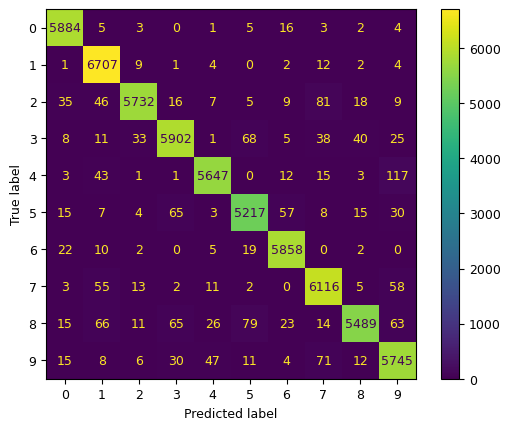

In [15]:
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)